In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("D:/Data Analytics/Projects/Amazon Sales/amazon_sales_2025_INR.csv")

In [33]:
print(df.head())

    Order_ID        Date Customer_ID Product_Category  Product_Name  Quantity  \
0  ORD100000  2025-01-25    CUST2796   Home & Kitchen  Cookware Set         2   
1  ORD100001  2025-08-28    CUST9669           Beauty    Hair Dryer         1   
2  ORD100002  2025-02-27    CUST5808      Electronics        Tablet         3   
3  ORD100003  2025-02-24    CUST5889      Electronics    Headphones         5   
4  ORD100004  2025-06-15    CUST9005         Clothing         Saree         5   

   Unit_Price_INR  Total_Sales_INR    Payment_Method Delivery_Status  \
0        25574.41         51148.82       Credit Card        Returned   
1        19361.41         19361.41        Debit Card        Returned   
2        38476.22        115428.66  Cash on Delivery       Delivered   
3        38145.72        190728.60       Credit Card       Delivered   
4        45940.98        229704.90               UPI       Delivered   

   Review_Rating         Review_Text      State Country  
0              1      

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

In [35]:
df['Month'] = df['Date'].dt.to_period('M')
df['Month_Name'] = df['Date'].dt.month_name()

In [36]:
print(f'Missing Values: {df.isnull().sum().sum()}')
print(f"Duplicates: {df.duplicated().sum()}")

Missing Values: 0
Duplicates: 0


In [37]:
df.to_csv('cleaned_amazon_sales_2025.csv', index = False)
print("Data cleaned and exported")


Data cleaned and exported


In [38]:
df.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Month,Month_Name
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,2025-01,January
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India,2025-08,August
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India,2025-02,February
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India,2025-02,February
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India,2025-06,June


In [39]:
sns.set(style="whitegrid", palette="muted")

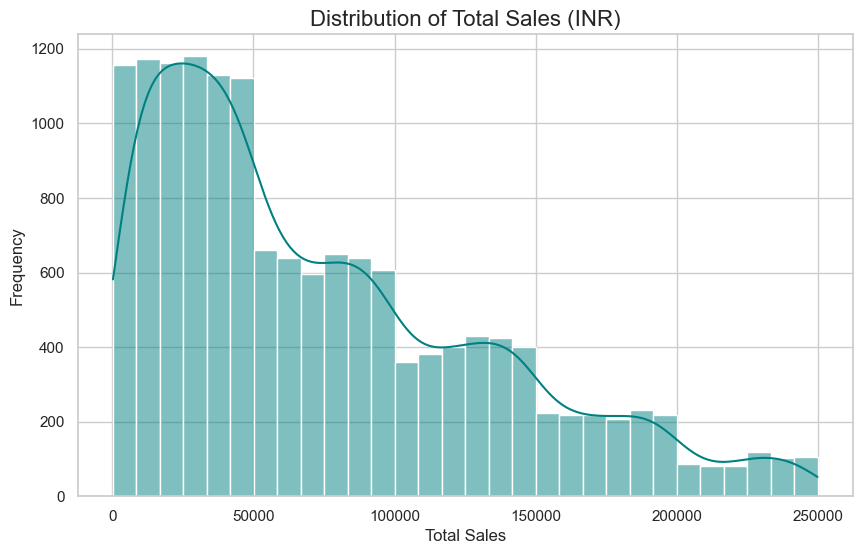

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Sales_INR'], bins=30, kde=True, color='teal')
plt.title('Distribution of Total Sales (INR)', fontsize=16)
plt.xlabel('Total Sales', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_15464\1910611540.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')


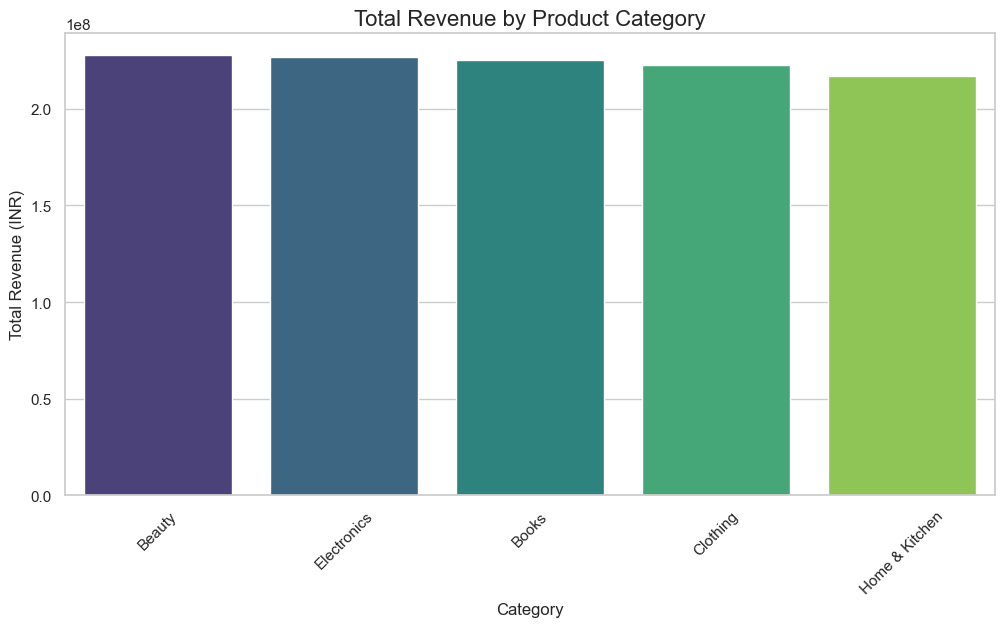

In [41]:
plt.figure(figsize=(12, 6))
cat_sales = df.groupby('Product_Category')['Total_Sales_INR'].sum().sort_values(ascending=False)
sns.barplot(x=cat_sales.index, y=cat_sales.values, palette='viridis')
plt.title('Total Revenue by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue (INR)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


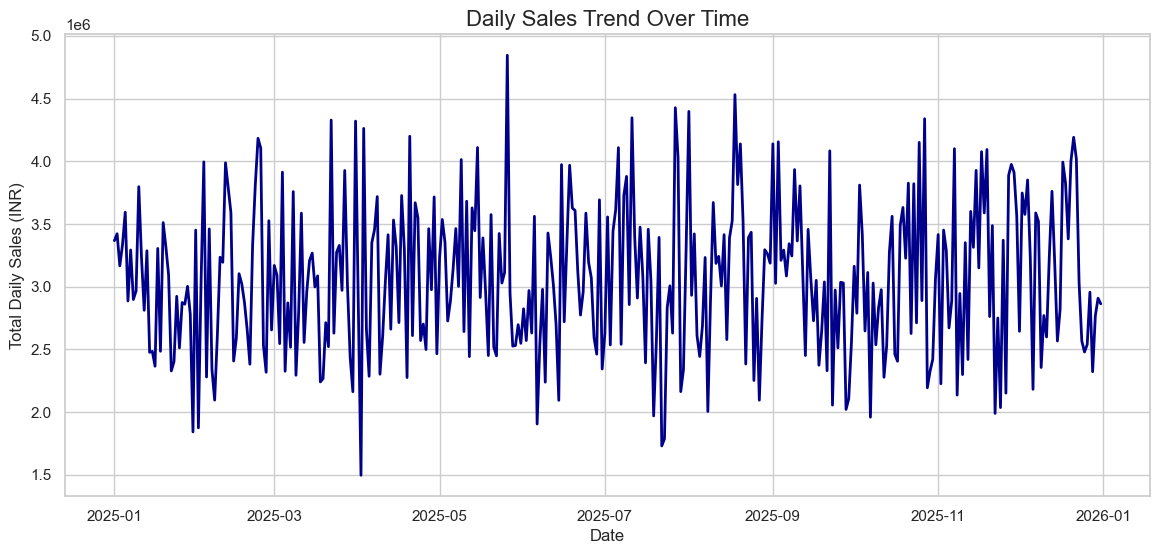

In [42]:
daily_sales = df.groupby('Date')['Total_Sales_INR'].sum().reset_index()
plt.figure(figsize = (14, 6))
sns.lineplot(data = daily_sales, x = 'Date', y = 'Total_Sales_INR', color = 'darkblue', linewidth = 2)
plt.title('Daily Sales Trend Over Time', fontsize = 16)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Total Daily Sales (INR)', fontsize = 12)
plt.show()


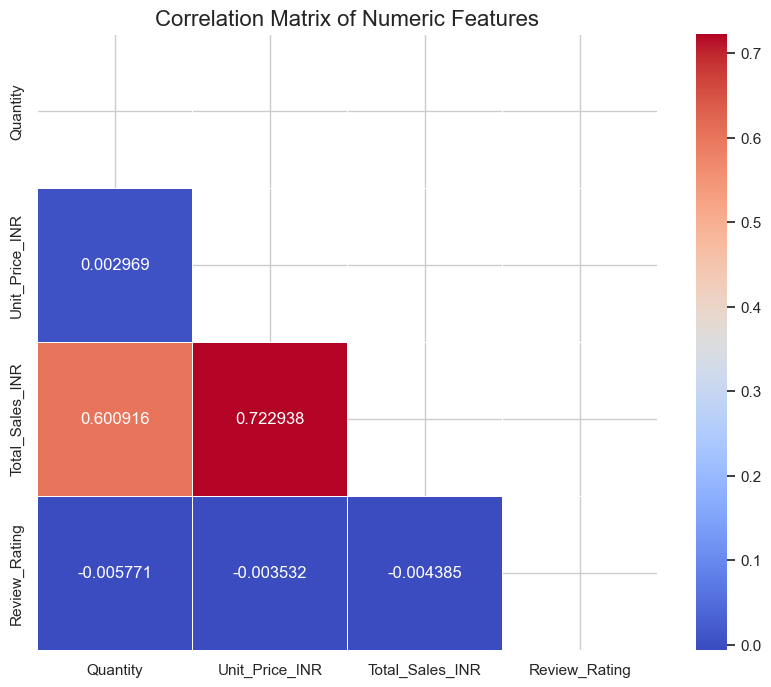

In [43]:
plt.figure(figsize = (10, 8))
numeric_df = df.select_dtypes(include = [np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, annot = True, cmap = 'coolwarm', fmt = '2f', linewidths = .5)
plt.title('Correlation Matrix of Numeric Features', fontsize = 16)
plt.show()

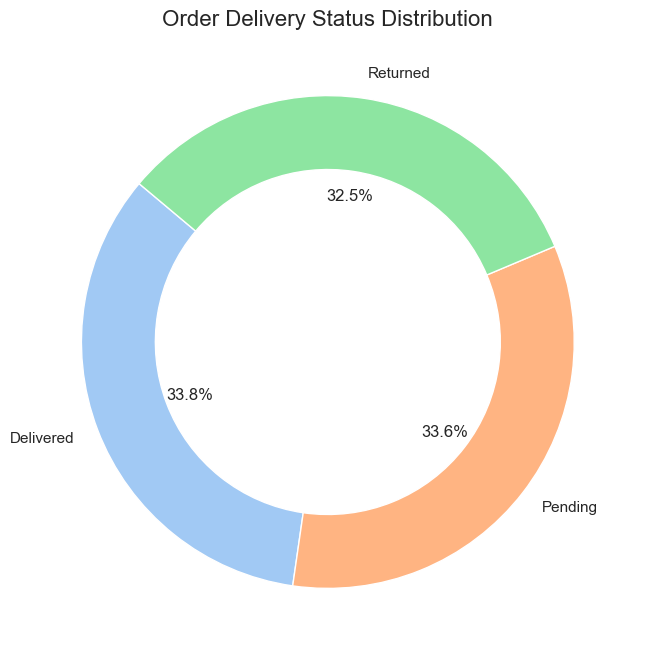

In [44]:
plt.figure(figsize = (8, 8))
status_counts = df['Delivery_Status'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%', startangle = 140, colors = sns.color_palette('pastel'), wedgeprops = dict(width = 0.3))
plt.title('Order Delivery Status Distribution', fontsize = 16)
plt.show()

In [45]:
# Sales Forecasting

In [46]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("D:/Data Analytics/Projects/Amazon Sales/cleaned_amazon_sales_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby('Date')['Total_Sales_INR'].sum().reset_index()
prophet_df = daily_sales.rename(columns = {'Date' : 'ds', 'Total_Sales_INR': 'y'})

In [48]:
model = Prophet()
model.fit(prophet_df)

21:47:59 - cmdstanpy - INFO - Chain [1] start processing
21:48:00 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
future = model.make_future_dataframe(periods = 180)
forecast = model.predict(future)

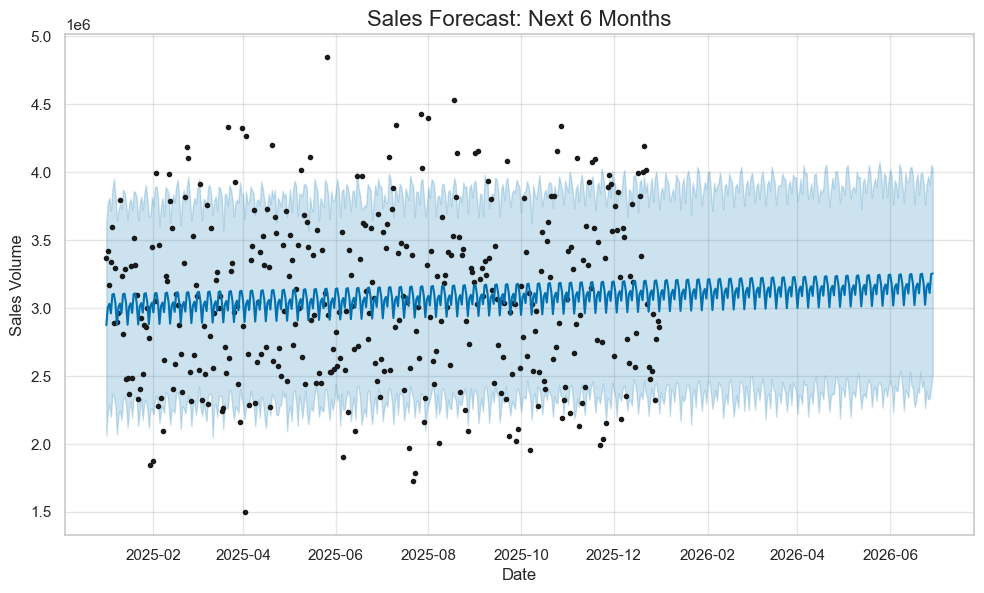

In [50]:
fig1 = model.plot(forecast)
plt.title('Sales Forecast: Next 6 Months', fontsize = 16)
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()

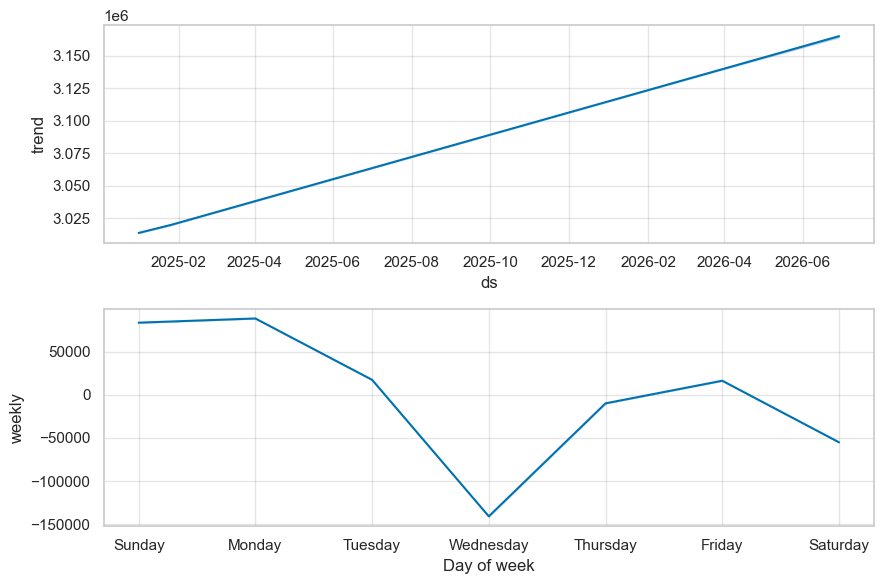

In [51]:
fig2 = model.plot_components(forecast)
plt.show()

In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('prophet_forecast_results.csv', index = False)

In [55]:
plot_plotly(model, forecast)

In [56]:
plot_components_plotly(model, forecast)